In [2]:
import os
import json
import numpy as np
import torch
from torch import nn
import torchvision
import random
from tqdm import *
from PIL import Image
from io import StringIO, BytesIO
import lpips

import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.utils.data as Data
from torch.utils.data import Dataset, DataLoader


from pro_gan_pytorch.utils import adjust_dynamic_range
from torch.nn.functional import interpolate
import torchvision.transforms.functional as fn
from train_log import MeanTracker

from torch.utils.tensorboard import SummaryWriter

import model_rs as recsys_models

In [1]:
def mapp(preference_scores):
    new_sorted_pref_score = []
    average_over = 3
    for i in preference_scores:
        i1 = i.sort(descending=True)[0][:average_over].unsqueeze(dim=0)
        new_sorted_pref_score.append(i1)

    new_sorted_pref_score = torch.cat(new_sorted_pref_score, dim=0)
    return new_sorted_pref_score

In [10]:
preference_scores_1 = mapp(torch.load('raw_data_exp/preference_score_U.pt')) 
base_preference_scores_1 = mapp(torch.load('raw_data_exp/base_preference_score_U.pt'))

preference_scores_5 = mapp(torch.load('raw_data_exp/multi_user/preference_score_U_5.pt')) 
base_preference_scores_5 = mapp(torch.load('raw_data_exp/multi_user/base_preference_score_U_5.pt').unsqueeze(dim=1))

preference_scores_10 = mapp(torch.load('raw_data_exp/multi_user/preference_score_U_10.pt')) 
base_preference_scores_10 = mapp(torch.load('raw_data_exp/multi_user/base_preference_score_U_10.pt').unsqueeze(dim=1))

preference_scores_50 = mapp(torch.load('raw_data_exp/multi_user/preference_score_U_50.pt')) 
base_preference_scores_50 = mapp(torch.load('raw_data_exp/multi_user/base_preference_score_U_50.pt').unsqueeze(dim=1))

preference_scores_100 = mapp(torch.load('raw_data_exp/multi_user/preference_score_U_100.pt'))
base_preference_scores_100 = mapp(torch.load('raw_data_exp/multi_user/base_preference_score_U_100.pt').unsqueeze(dim=1))

preference_scores_500 = mapp(torch.load('raw_data_exp/multi_user/preference_score_U_500.pt'))
base_preference_scores_500 = mapp(torch.load('raw_data_exp/multi_user/base_preference_score_U_500.pt').unsqueeze(dim=1))

preference_scores_1000 = mapp(torch.load('raw_data_exp/multi_user/preference_score_U_1000.pt'))
base_preference_scores_1000 = mapp(torch.load('raw_data_exp/multi_user/base_preference_score_U_1000.pt').unsqueeze(dim=1))

preference_scores_10000 = mapp(torch.load('raw_data_exp/multi_user/preference_score_U_10000.pt'))
base_preference_scores_10000 = mapp(torch.load('raw_data_exp/multi_user/base_preference_score_U_10000.pt').unsqueeze(dim=1))

In [14]:
shifted_in_score_1 = (preference_scores_1 - base_preference_scores_1).mean(dim=1)
shifted_in_score_5 = (preference_scores_5 - base_preference_scores_5).mean(dim=1)
shifted_in_score_10 = (preference_scores_10 - base_preference_scores_10).mean(dim=1)
shifted_in_score_50 = (preference_scores_50 - base_preference_scores_50).mean(dim=1)
shifted_in_score_100 = (preference_scores_100 - base_preference_scores_100).mean(dim=1)
shifted_in_score_500 = (preference_scores_500 - base_preference_scores_500).mean(dim=1)
shifted_in_score_1000 = (preference_scores_1000 - base_preference_scores_1000).mean(dim=1)
shifted_in_score_10000 = (preference_scores_10000 - base_preference_scores_10000).mean(dim=1)

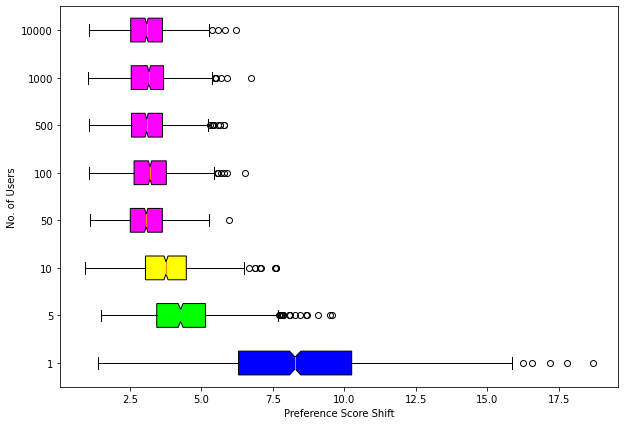

In [24]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
# Creating dataset
data = [shifted_in_score_1, shifted_in_score_5, shifted_in_score_10, shifted_in_score_50,shifted_in_score_100,shifted_in_score_500,shifted_in_score_1000,shifted_in_score_10000]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF',
          '#FF00FF', '#FF00FF',
          '#FF00FF', '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# # changing color and linewidth of
# # whiskers
# for whisker in bp['whiskers']:
#     whisker.set(color ='#8B008B',
#                 linewidth = 1.5,
#                 linestyle =":")
 
# # changing color and linewidth of
# # caps
# for cap in bp['caps']:
#     cap.set(color ='#8B008B',
#             linewidth = 2)
 
# # changing color and linewidth of
# # medians
# for median in bp['medians']:
#     median.set(color ='red',
#                linewidth = 3)
 
# # changing style of fliers
# for flier in bp['fliers']:
#     flier.set(marker ='D',
#               color ='#e7298a',
#               alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['1', '5', '10',
                    '50', '100', '500',
                    '1000', '10000'])
 
# Adding title
# plt.title("Preference Score Shift (N Users)")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_ylabel('No. of Users')
ax.set_xlabel('Preference Score Shift')
     
# show plot
plt.savefig('raw_data_exp/box.png',bbox_inches='tight')